In [1]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     -------- ----------------------------- 143.4/636.8 kB 4.3 MB/s eta 0:00:01
     -------------- ----------------------- 235.5/636.8 kB 2.9 MB/s eta 0:00:01
     --------------------- ---------------- 368.6/636.8 kB 2.9 MB/s eta 0:00:01
     -------------------------- ----------- 450.6/636.8 kB 2.8 MB/s eta 0:00:01
     --------------------------------- ---- 563.2/636.8 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from textblob import TextBlob

# Load the Excel file into a DataFrame
file_path = r"C:\Users\ksamy\Desktop\CEO thoughts on  AI\CEO thoughts on AI.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

In [7]:
df.head()

,S.NO.,TOP COMPANIES IN THE WORLD,CEO NAME,THOUGHTS ON AI,CORE OF THE COMPANY,CEO GENDER,CEO AGE,SENTIMENT
0,1,AbbVie,Richard A.Gonzalez,Our goal is to advance science with the power ...,Pharmaceutical,Male,69,Positive
1,2,Accenture,Julie Terese Sweet,"“By adopting and scaling A.I., companies can t...",Technology,Female,57,Positive
2,3,Adobe,Shantanu Narayen,"Shantanu Narayen, CEO of Adobe Inc., believes ...",Technology,Male,60,Positive
3,4,Alibaba,Daniel Zhang,Daniel Zhang will step down from its cloud bus...,Retail,Male,51,Neutral
4,5,Alphabet,Sundar Pichai,Artificial Intelligence has been dominating th...,Technology,Male,51,Neutral


In [11]:
df.columns

Index(['S.NO.', 'TOP COMPANIES IN THE WORLD ', 'CEO NAME ', 'THOUGHTS ON AI ',
       'CORE OF THE COMPANY ', 'CEO GENDER ', 'CEO AGE ', 'SENTIMENT'],
      dtype='object')

In [29]:
# Ensure that the "Thoughts on AI" column contains text data
df['THOUGHTS ON AI '] = df['THOUGHTS ON AI '].astype(str)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text as positive, negative, or neutral
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
# Apply sentiment analysis to the "Thoughts on AI" column and create a new column for sentiment
df['Sentiment'] = df['THOUGHTS ON AI '].apply(analyze_sentiment)

# Display the DataFrame with the added "Sentiment" column
print(df[['TOP COMPANIES IN THE WORLD ', 'CEO NAME ', 'THOUGHTS ON AI ', 'Sentiment']])

              TOP COMPANIES IN THE WORLD                    CEO NAME   \
0                                  AbbVie          Richard A.Gonzalez   
1                               Accenture          Julie Terese Sweet   
2                                   Adobe            Shantanu Narayen   
3                                 Alibaba               Daniel Zhang    
4                                Alphabet              Sundar Pichai    
5                                 Amazon                   Andy Jassy   
6                                  Apple                    Tim Cook    
7                                    ASML                Peter Wennik   
8                             AstraZeneca               Pascal Soriot   
9                        Bank of America              Brian Moynihan    
10                     Berkshire Hathaway              Warren Buffet    
11                                 BP PLC              Bernard Looney   
12                               Broadcom          

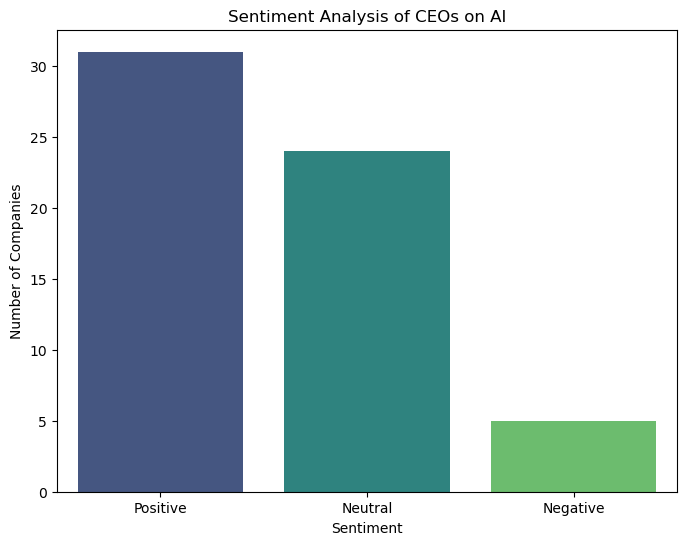

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame with the "Sentiment" column and "Core of the Company" column
# If not, you should load the data and perform sentiment analysis as shown before

# ----- Sentiment Analysis Chart -----

# Count the number of companies with each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment analysis chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of CEOs on AI')
plt.xlabel('Sentiment')
plt.ylabel('Number of Companies')
plt.show()

In [33]:
# Assuming you have the DataFrame with the "Sentiment" column and "Core of the Company" column
# If not, you should load the data and perform sentiment analysis as shown before

# Group the DataFrame by the "Core of the Company" column
grouped_df = df.groupby('CORE OF THE COMPANY ')

# Initialize a dictionary to store adoption rates for each core
adoption_rates = {}

# Calculate the adoption rate for each core
for core, core_group in grouped_df:
    total_companies_in_core = len(core_group)
    positive_sentiment_companies_in_core = core_group[core_group['Sentiment'] == 'Positive']
    
    adoption_rate = len(positive_sentiment_companies_in_core) / total_companies_in_core * 100
    adoption_rates[core] = adoption_rate

# Print the adoption rates for each core
print("Adoption Rates based on Core of the Company:")
for core, rate in adoption_rates.items():
    print(f"{core}: {rate:.2f}%")

Adoption Rates based on Core of the Company:
Consumer goods : 50.00%
Entertainment service: 100.00%
Finance: 85.71%
Healthcare: 100.00%
Manufacturer: 25.00%
Petroleum: 37.50%
Pharmaceutical: 57.14%
Retail: 50.00%
Technology : 46.15%


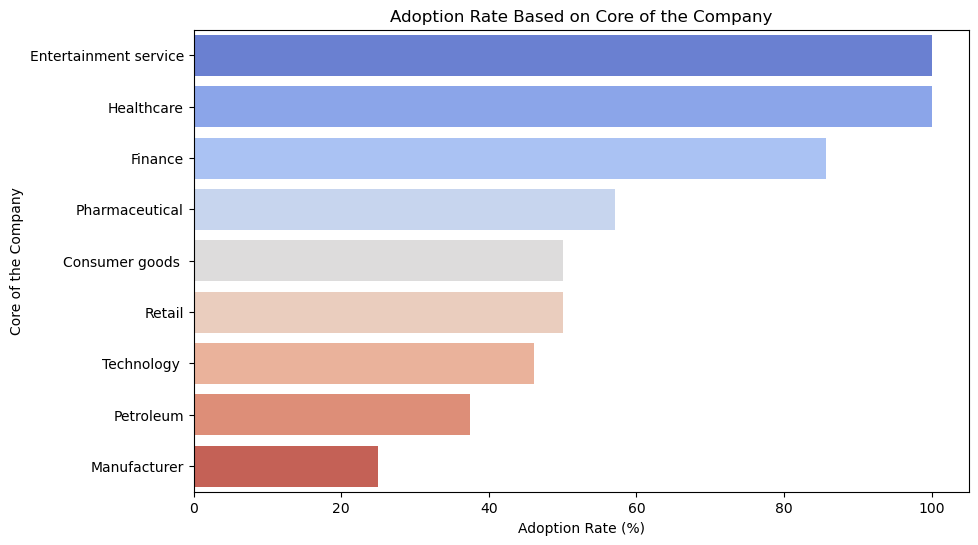

In [34]:
# ----- Adoption Rate Chart -----

# Assuming you have already calculated adoption rates for each core
# If not, use the previous code snippet to calculate adoption rates

# Create a DataFrame for adoption rates
adoption_df = pd.DataFrame(list(adoption_rates.items()), columns=['Core of the Company', 'Adoption Rate'])

# Sort the DataFrame by adoption rate in descending order
adoption_df = adoption_df.sort_values(by='Adoption Rate', ascending=False)

# Plot the adoption rate chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Adoption Rate', y='Core of the Company', data=adoption_df, palette='coolwarm')
plt.title('Adoption Rate Based on Core of the Company')
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Core of the Company')
plt.show()

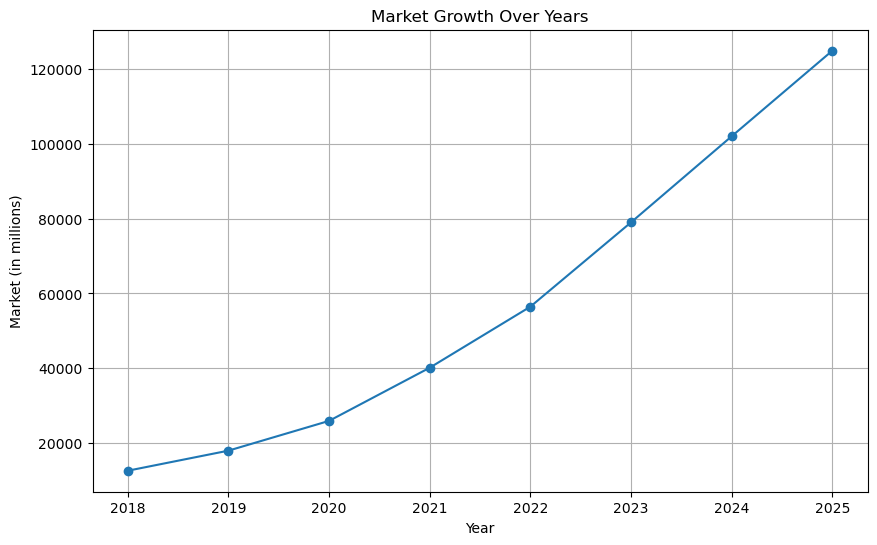

In [35]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame with the "YEAR" and "MARKET(in millions)" columns
# If not, you should load the data

# Your data
years = [2018,2019,2020,2021,2022,2023,2024,2025]  # Replace with your actual data
market_values = [12566.89,17936.09,25898.12,40121.10,56451.80,79006.57,102033.32,124930.76]  # Replace with your actual data

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, market_values, marker='o', linestyle='-')

# Customize the chart
plt.title('Market Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Market (in millions)')
plt.grid(True)
plt.show()

In [ ]:
# Save the DataFrame with sentiment analysis results to a new Excel file
output_file_path = 'path/to/your/output/file.xlsx'  # Replace with the desired output file path
df.to_excel(output_file_path, index=False)